In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import psana
from tqdm import tqdm
from utilities import *

In [3]:
expname = 'xppl1001021'
run = 24
with h5py.File('/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/{}_Run{:04d}.h5'.format(expname, expname, run)) as f:
    print (f.keys())
    mask = f['UserDataCfg/epix_alc5/mask'][()] #this is the general mask 
    droplet_mask = f['UserDataCfg/epix_alc5/ragged_droplet__ragged_droplet_droplet_mask'][()] # we added a droplet mask 
    photons_j = f['epix_alc5/ragged_droplet_photon_j'][()]
    photons_i = f['epix_alc5/ragged_droplet_photon_i'][()]

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'adc', 'ai', 'damage', 'diode2', 'diodeU', 'ebeam', 'epics', 'epicsAll', 'epix_alc5', 'epix_alc5_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm2', 'ipm_hx2', 'lightStatus', 'lombpm', 'lomdiode', 'scan']>


<IPython.core.display.Javascript object>


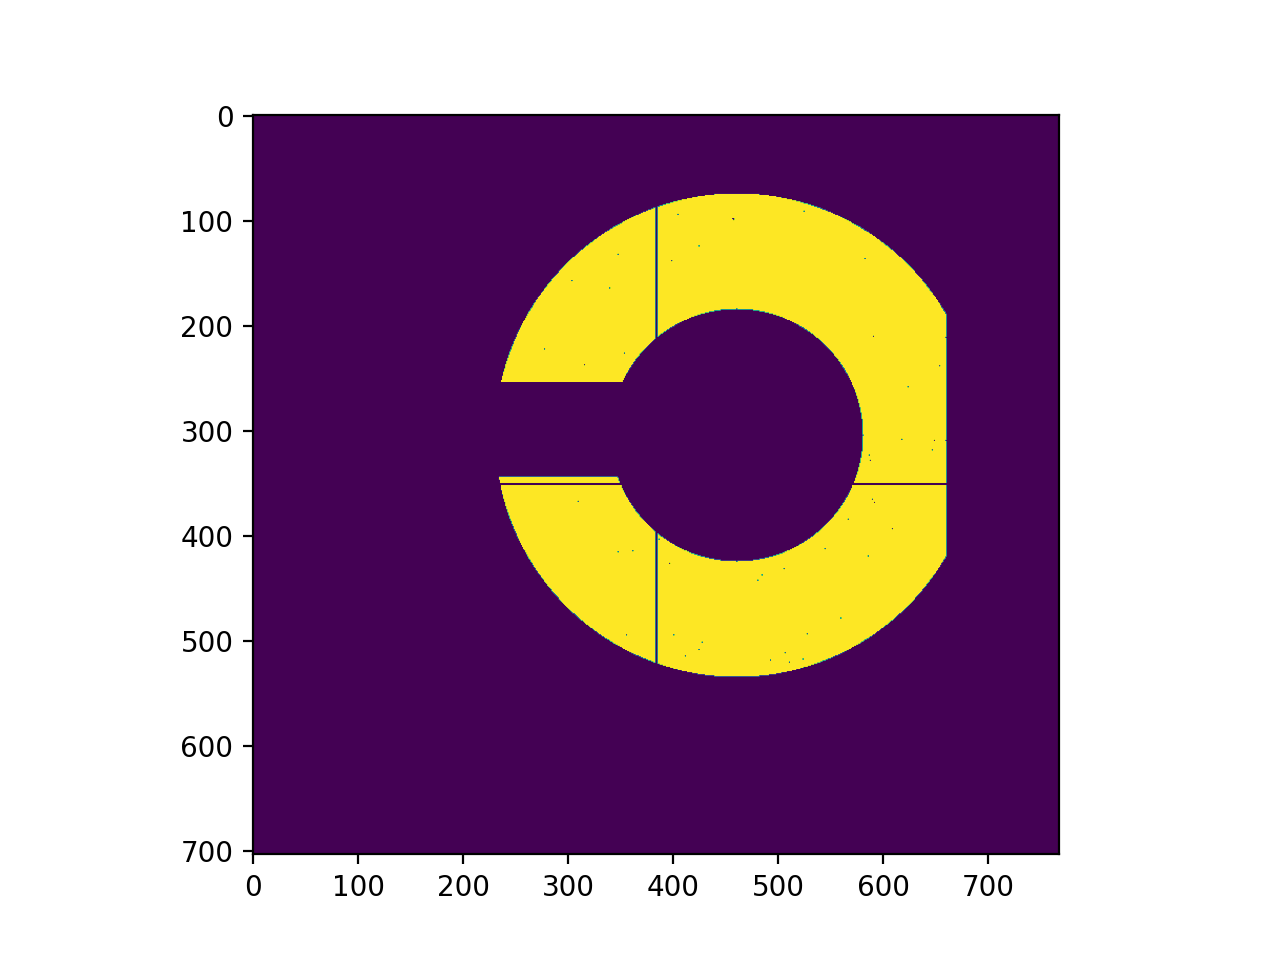

In [4]:
plt.figure()
plt.imshow(mask*droplet_mask) # this is droplet mask

In [5]:
shape = mask.shape
nframe = len(photons_i)
nframe = 120
imgs_reconstruct = np.zeros(np.r_[nframe, shape])
for i in tqdm(range(nframe)):
    imgs_reconstruct[i] = reconstruct_img(photons_i[i], photons_j[i], shape)

100%|██████████| 120/120 [00:00<00:00, 190.61it/s]


<IPython.core.display.Javascript object>


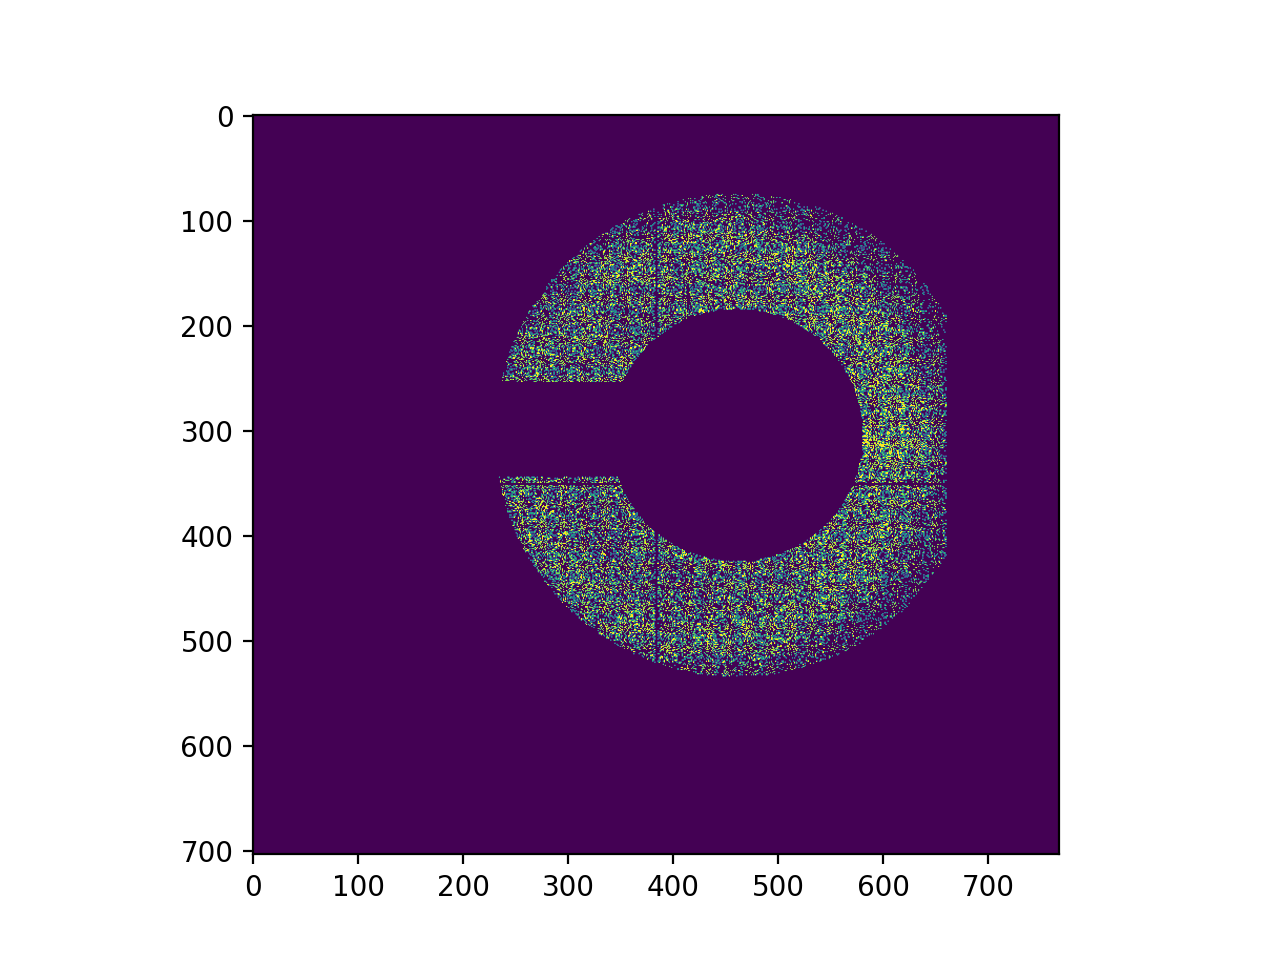

In [6]:
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0), vmin = 0, vmax = 0.01)